# 1.) Pull in Data and Convert ot Monthly

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]

[*********************100%%**********************]  1 of 1 completed


# 2.) Create columns. 
  - Current Stock Price, Difference in stock price, Whether it went up or down over the next month,  option premium

In [6]:
# DIFFERENCE IN STOCK PRICE
df["Diff"] = df["Adj Close"].diff().shift(-1)

# Target
df["Target"] = np.sign(df["Diff"])

# Premium
df["Premium"] = .08 * df["Adj Close"]

# 3.) Pull in X data, normalize and build a LogReg on column 2

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [8]:
X = pd.read_csv("Xdata.csv", index_col="Date", parse_dates=["Date"])

In [9]:
y = df.loc[:"2023-09-30","Target"].copy()

df = df.loc[: "2023-09-30",:].copy()

In [11]:
# fit a log reg
logreg = LogisticRegression()
logreg.fit (X,y)

LogisticRegression()

# 4.) Add columns, prediction and profits.

In [12]:
y_pred = logreg.predict(X)

In [21]:
df["Predictions"] = y_pred

In [22]:
df["Profits"] = 0

In [23]:
df.loc[(df["Target"] ==1) & (df["Predictions"] ==1), "Profits"] = df["Premium"]
        
df.loc[(df["Target"] == -1) & (df["Predictions"] ==1), "Profits"] = (100*df["Diff"] + df["Premium"])

# 5.) Plot profits over time

Text(0.5, 1.0, 'Profits over time')

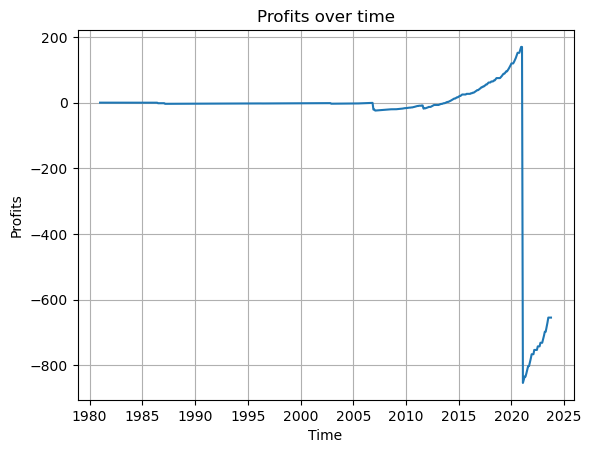

In [24]:
plt.plot(np.cumsum(df["Profits"]))
plt.grid()
plt.xlabel("Time")
plt.ylabel("Profits")
plt.title("Profits over time")


# 5.5.) A short write up about how you see your skills valuable to PJ and or Phillip Liu

As an MQE student, my quantitative and analytical skills are valuable for the companies that presented on Wednesday. My advanced quantitative and analytical capabilities, honed during the program, enable proficient analysis of complex economic data, facilitating data-driven decision-making, strategy optimization, and adaptability to the evolving tech landscape.

The economic modeling and statistical analysis expertise acquired during my MQE studies directly contributes to forecasting and scenario planning, offering valuable insights for strategic decision-making in technology organizations. In the semiconductor value chain, where market dynamics are crucial, these analytical skills prove beneficial for making informed operational and strategic choices amid uncertainties.

Furthermore, my MQE training has refined my communication skills, allowing me to convey intricate economic analyses in a clear and accessible manner. This proficiency is essential for effective collaboration within diverse teams, a valuable asset in technology platforms and semiconductor companies where interdisciplinary cooperation is paramount.

In summary, my MQE background positions me as a valuable asset, bringing a combination of quantitative rigor, analytical insights, and effective communication to contribute to the success, strategic growth, and resilience of technology platforms and semiconductor companies in dynamic business environments.

# 6.) Create a loop that stores total profits over time

# 7.) What is the optimal threshold and plot the total profits for this model.